In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, preprocessing
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings(action='ignore')  

In [ ]:
url = 'https://github.com/alfi33/AI-Project/blob/main/weatherAUS.csv?raw=true'
data = pd.read_csv(url)

#data = pd.read_csv("weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')


**About the data:**

The dataset contains about 10 years of daily weather observations from different locations across Australia. Observations were drawn from numerous weather stations. 

In this project, we will use this data to predict whether or not it will rain the next day. There are 23 attributes including the target variable "RainTomorrow", indicating whether or not it will rain the next day or not. 

In [ ]:
#Lets see the categories present in all the categorical variables.
for column in data:
    if(data[column].dtype == 'object'):
        print(data[column].value_counts())

2016-05-04    49
2013-05-09    49
2013-07-20    49
2016-12-24    49
2014-02-04    49
              ..
2007-11-24     1
2007-12-04     1
2007-12-15     1
2007-11-21     1
2007-11-01     1
Name: Date, Length: 3436, dtype: int64
Canberra            3436
Sydney              3344
Perth               3193
Adelaide            3193
Hobart              3193
Brisbane            3193
Melbourne           3193
Darwin              3193
AliceSprings        3040
GoldCoast           3040
Wollongong          3040
MountGambier        3040
Bendigo             3040
Albury              3040
Townsville          3040
Albany              3040
Cairns              3040
Ballarat            3040
MountGinini         3040
Launceston          3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
WaggaWagga          3009
Portland            3009
Watsonia            3009
Nuriootpa           3009
Richmond            3009
Cobar               3009
PearceRAAF          3009
Witchcliffe         3009

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null



 
# DATA VISUALIZATION AND CLEANING

**Steps involves in this section:**

* Count plot of target column 
* Correlation amongst numeric attributes and removing highly correlated attributes
* Parse Dates into datetime
* Missing values processing
* Label encoding



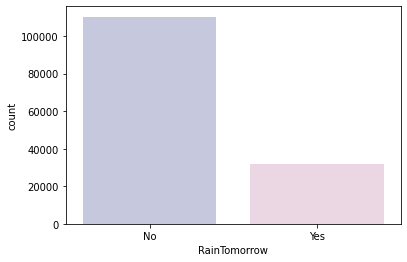

In [ ]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= data["RainTomorrow"], palette= cols)

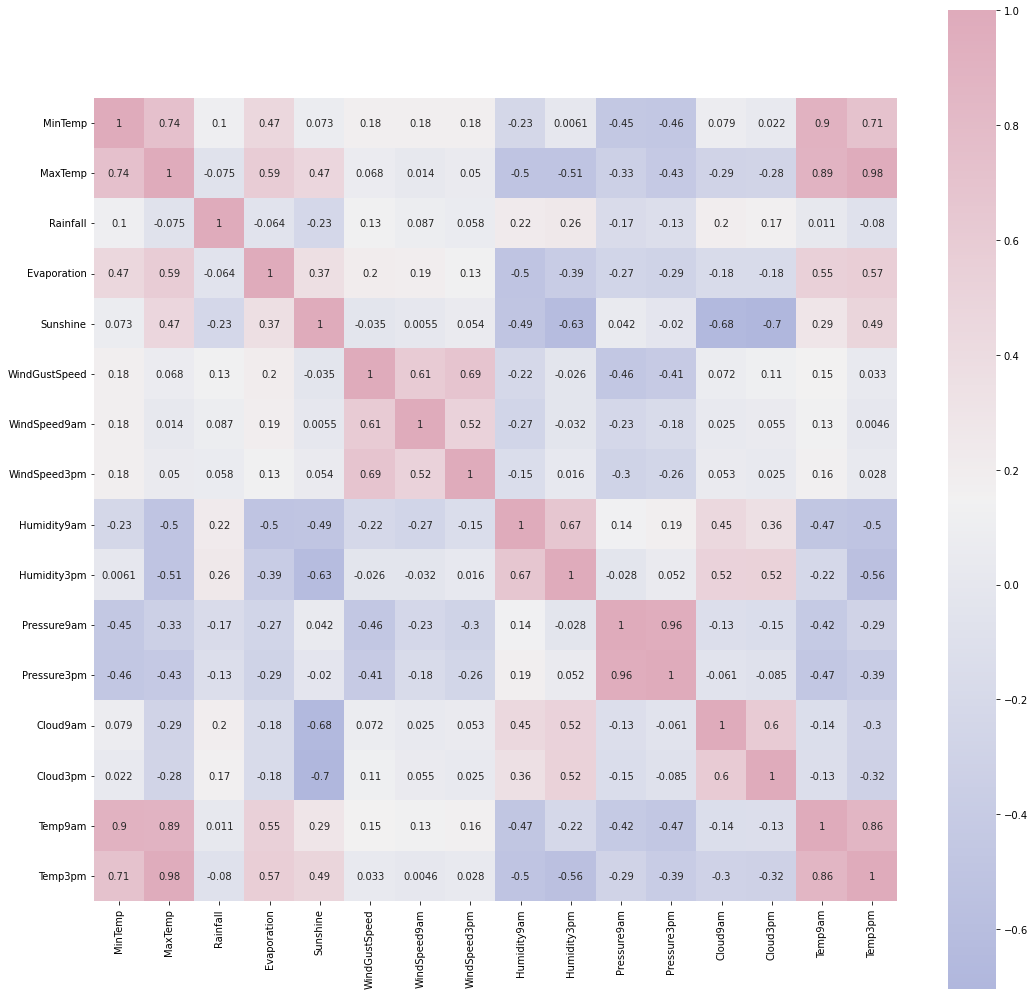

In [ ]:
# Correlation amongst numeric attributes
corrmat = data.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

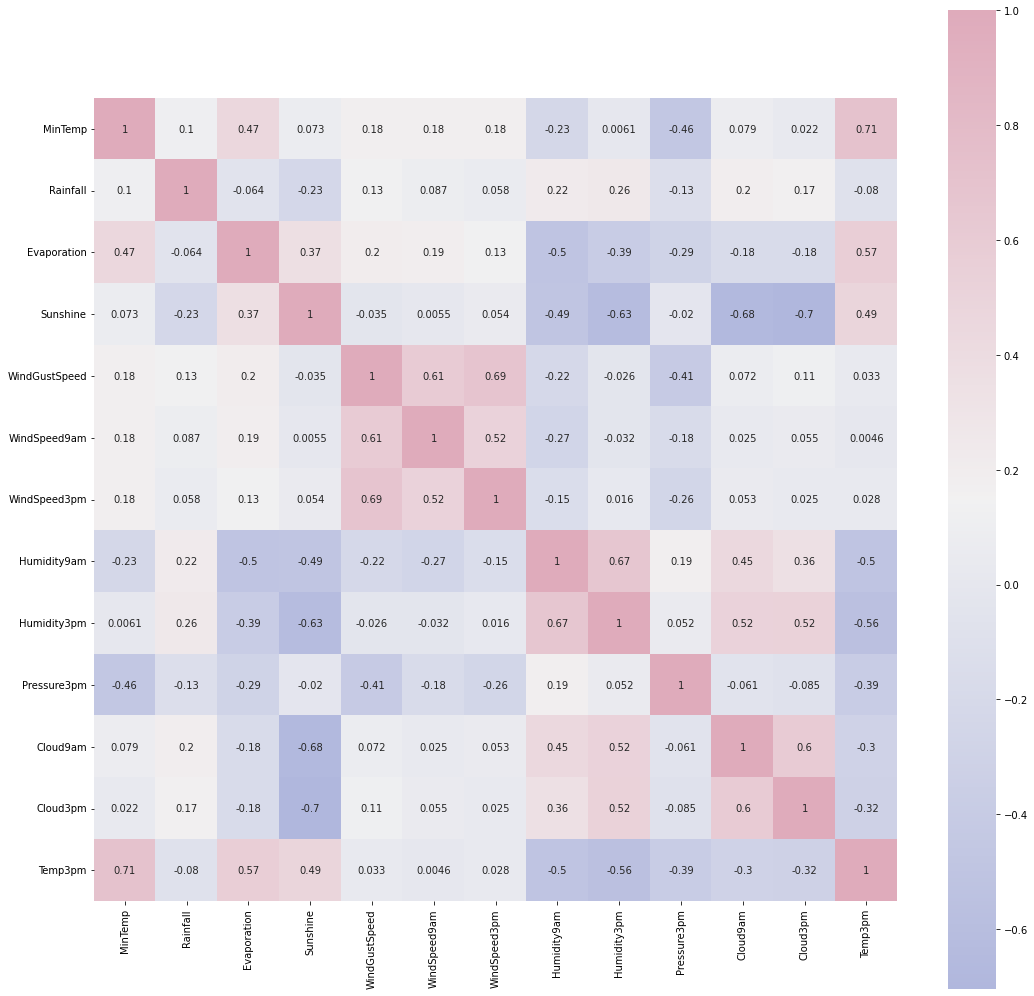

In [ ]:
# As you can see we have the below highly correlated values >=0.89
# MaxTemp vs Temp9am, Temp3pm vs Temp9am, Pressure3pm vs Pressure9am, MaxTemp vs Temp3pm
#Removing Temp9am,Pressure9am, MaxTemp

data.drop('Temp9am',axis=1, inplace=True)
data.drop('Pressure9am',axis=1, inplace=True)
data.drop('MaxTemp',axis=1, inplace=True)

# Correlation amongst numeric attributes
corrmat = data.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

**Now will parse Dates into datetime.**

In [ ]:
#Parsing datetime

#create 3 columns from date as year month and day of month
data['Year'] = data['Date'].apply(lambda x:int(x.split('-')[0]))
data['Month'] = data['Date'].apply(lambda x:int(x.split('-')[1]))
data['day'] = data['Date'].apply(lambda x:int(x.split('-')[2]))

data.head()

,Date,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow,Year,Month,day
0,2008-12-01,Albury,13.4,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.1,8.0,NaN,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1007.8,NaN,NaN,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1008.7,NaN,2.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1012.8,NaN,NaN,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1006.0,7.0,8.0,29.7,No,No,2008,12,5


Text(0.5, 0, 'Years')

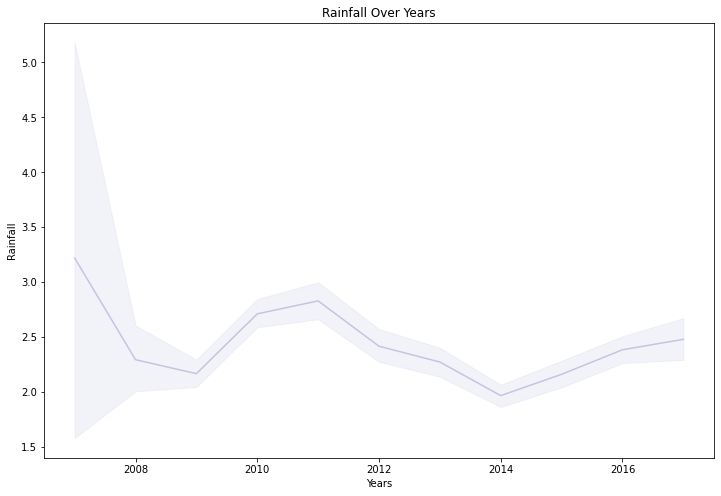

In [ ]:
#plotting a lineplot rainfall over years
data['Date']= pd.to_datetime(data["Date"])
plt.figure(figsize=(12,8))
Time_series=sns.lineplot(x=data['Date'].dt.year,y="Rainfall",data=data,color="#C2C4E2")
Time_series.set_title("Rainfall Over Years")
Time_series.set_ylabel("Rainfall")
Time_series.set_xlabel("Years")



## Missing value processing: 

In [ ]:
# Check for the percentage of missing values.
pd.isnull(data).mean(axis=0)

Date             0.000000
Location         0.000000
MinTemp          0.010209
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp3pm          0.024811
RainToday        0.022419
RainTomorrow     0.022460
Year             0.000000
Month            0.000000
day              0.000000
dtype: float64

In [ ]:
#Removing features which have above 40% missing values
#3 features removed: Evaporation, Sunshine and Cloud3pm
pct_null = data.isnull().mean()
missing_features = pct_null[pct_null > 0.40].index
data.drop(missing_features,axis=1, inplace=True)
data.shape

(145460, 20)

In [ ]:
# The data head after removing the missing values > 40%
data.head(5)

,Date,Location,MinTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Temp3pm,RainToday,RainTomorrow,Year,Month,day
0,2008-12-01,Albury,13.4,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.1,8.0,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1007.8,NaN,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1008.7,NaN,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1012.8,NaN,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1006.0,7.0,29.7,No,No,2008,12,5


In [ ]:
#Filling the Null Values using mean and mode
for column in data:
    if(data[column].isnull().sum()!=0):
            if(data[column].dtype !='object'):
                data[column].fillna(data[column].mean(),inplace=True)
            else:
                data[column].fillna(data[column].mode()[0],inplace=True)

In [ ]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure3pm      0
Cloud9am         0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
day              0
dtype: int64

**Label encoding the catagorical varable**

In [ ]:
# Get list of categorical variables
s = (data.dtypes == "object")
object_cols = list(s[s].index)

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for i in object_cols:
    data[i] = label_encoder.fit_transform(data[i])
    

In [ ]:
# Prepairing attributes of scale data

features = data.drop(['Date'], axis=1) # dropping Date columns

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 

features.describe().T
features.shape

(145460, 19)

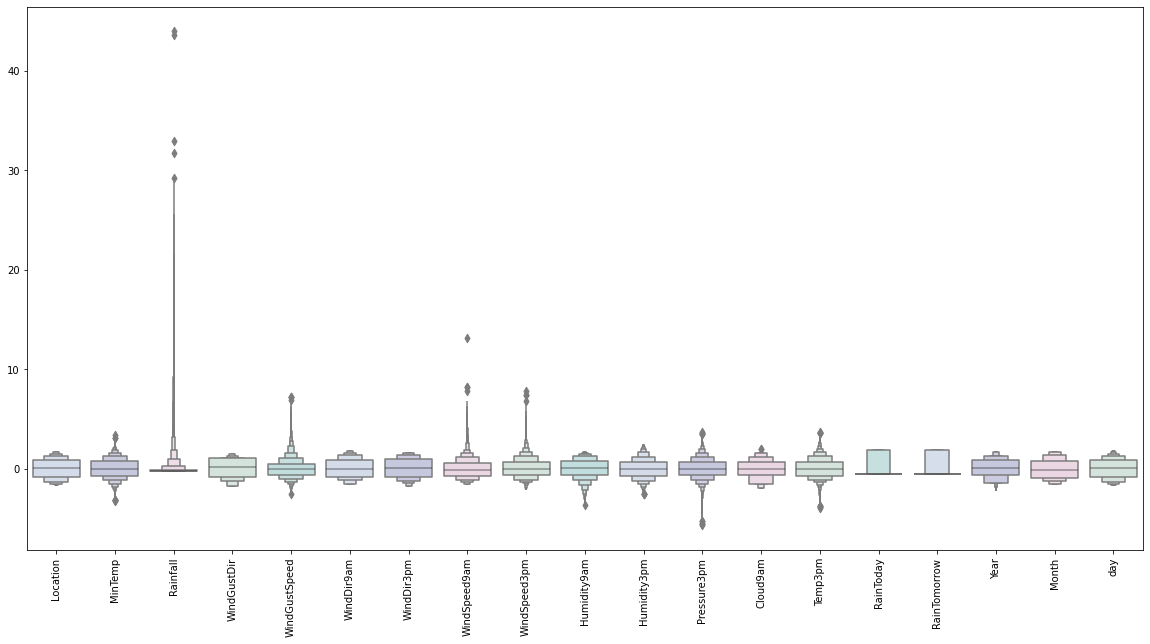

In [ ]:
#Detecting outliers
#looking at the scaled features
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#full data for 
features["RainTomorrow"] = data['RainTomorrow']

#Dropping with outlier

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]


features.shape

(131608, 19)

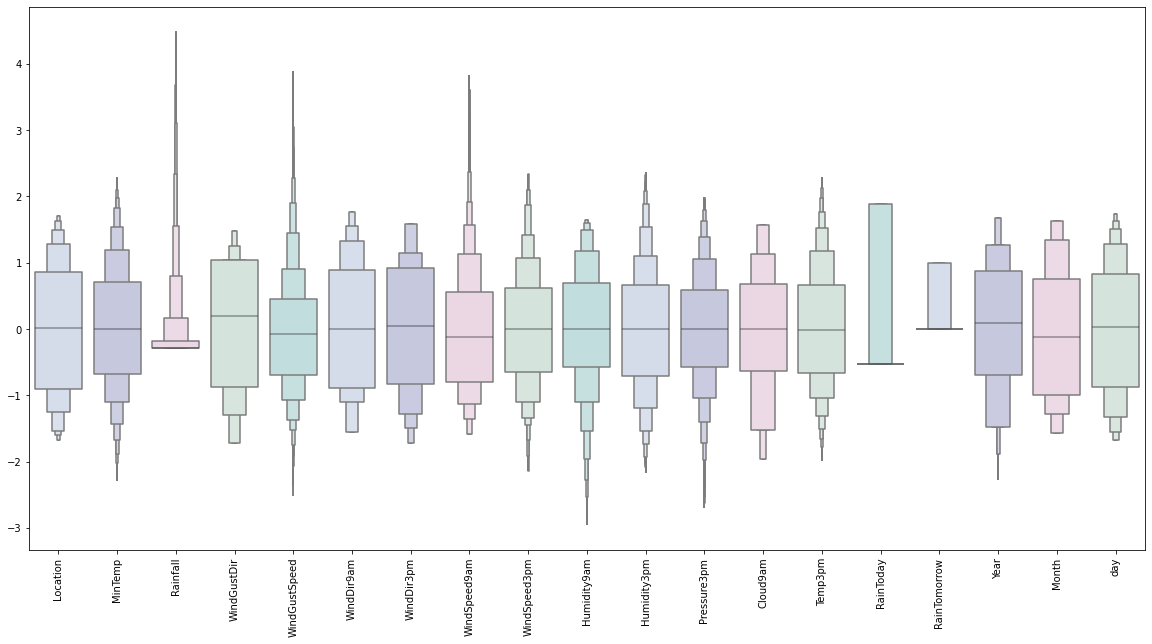

In [ ]:
#looking at the scaled features without outliers

plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()


 
# MODEL BUILDING




**Following steps are involved in the model building**

* Assigning X and y the status of attributes and tags
* Splitting test and training sets

KNN neighbours
* KNN bias-Variance tradeoff as function of k
* KNN hyperparameter optimization

Logistic Regression
* Train and predict
* Accuracy, Sensitivity, Specificity and Precision using the confusion matrix
* ROC curve

Neural network
* Initialising the neural network
* Defining by adding layers
* Compiling the neural network
* Train the neural network

In [ ]:
X = features.drop(['RainTomorrow'], axis=1)
y = features['RainTomorrow']

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(131608, 18)
(131608,)
(92125, 18)
(39483, 18)
(92125,)
(39483,)


**KNN neighbours**

In [ ]:
# KNN with n_neighbours = 100
knn100 = KNeighborsClassifier(n_neighbors=100)
knn100.fit(X_train, y_train)
y_pred = knn100.predict(X_test)
print(metrics.confusion_matrix(y_test,y_pred))
print("------------------------")
print( "Accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred),3)))

[[30339   853]
 [ 5687  2604]]
------------------------
Accuracy : 0.834


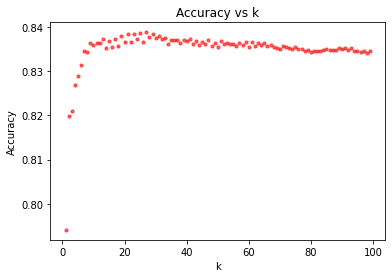

In [ ]:
#KNN bias-Variance tradeoff as function of k:
accs = []
k_grid = range(1,100,1)
for k in k_grid:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accs.append(metrics.accuracy_score(y_test,y_pred))
    
# Visualize.
plt.scatter(k_grid,accs,c='red',marker='o',s=10,alpha=0.6)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

In [ ]:
#KNN hyperparameter optimization:
#Parameter grid.
k_grid = np.arange(1,51,1)
parameters = {'n_neighbors':k_grid}

# Optimize the k.
gridCV = GridSearchCV(KNeighborsClassifier(), parameters, cv=10, n_jobs = -1)       # "n_jobs = -1" means "use all the CPU cores".
gridCV.fit(X_train, y_train)
best_k = gridCV.best_params_['n_neighbors']
print("Best k : " + str(best_k))

# Test with the best k.
KNN_best = KNeighborsClassifier(n_neighbors=best_k)
KNN_best.fit(X_train, y_train)
y_pred = KNN_best.predict(X_test)
print( "Best Accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred),3)))

Best k : 25
Best Accuracy : 0.839


**Logistic Regression**

In [ ]:
#Train and predict
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

# Confusion matrix.
conf_mat = metrics.confusion_matrix(y_test,y_pred)
print(conf_mat)

# Now, predict the probability of Y  = 1.
y_pred_prob=LR.predict_proba(X_test)[:,1]

# Accuracy, Sensitivity, Specificity and Precision using the confusion matrix.
accuracy = metrics.accuracy_score(y_test,y_pred)
sensitivity = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
print('Accuracy    = {}'.format(round(accuracy,3)))
print('Sensitvity  = {}'.format(round(sensitivity,3)))
print('Precision   = {}'.format(round(precision,3)))

[[29575  1617]
 [ 4731  3560]]
Accuracy    = 0.839
Sensitvity  = 0.429
Precision   = 0.688


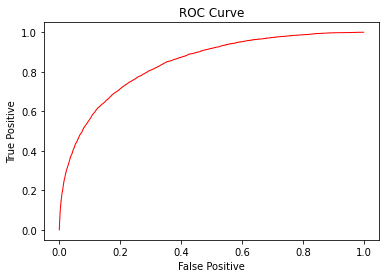

In [ ]:
#ROC curve (sklearn):

# Calculate the TPR and FPR using a Scikit Learn function.
FPR, TPR, cutoffs = metrics.roc_curve(y_test,y_pred_prob,pos_label=1)      # positive label = 1.

# Visualize.
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

In [ ]:
# AUC.
auc = metrics.roc_auc_score(y_test,y_pred_prob)
print('AUC  = {}'.format(np.round(auc,3)))

AUC  = 0.841


**Neural Network**

In [ ]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 18))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 15, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/15
2304/2304 [==============================] - 13s 5ms/step - loss: 0.4858 - accuracy: 0.7852 - val_loss: 0.4006 - val_accuracy: 0.7869
Epoch 2/15
2304/2304 [==============================] - 6s 2ms/step - loss: 0.4183 - accuracy: 0.7853 - val_loss: 0.3920 - val_accuracy: 0.7869
Epoch 3/15
2304/2304 [==============================] - 5s 2ms/step - loss: 0.4125 - accuracy: 0.7853 - val_loss: 0.3897 - val_accuracy: 0.7869
Epoch 4/15
2304/2304 [==============================] - 5s 2ms/step - loss: 0.4135 - accuracy: 0.7853 - val_loss: 0.3879 - val_accuracy: 0.7869
Epoch 5/15
2304/2304 [==============================] - 5s 2ms/step - loss: 0.4102 - accuracy: 0.7853 - val_loss: 0.3866 - val_accuracy: 0.7869
Epoch 6/15
2304/2304 [==============================] - 5s 2ms/step - loss: 0.4119 - accuracy: 0.7853 - val_loss: 0.3857 - val_accuracy: 0.7869
Epoch 7/15
2304/2304 [==============================] - 5s 2ms/step - loss: 0.4118 - accuracy: 0.8242 - val_loss: 0.3849 - val_accuracy

Plotting training and validation loss over epochs

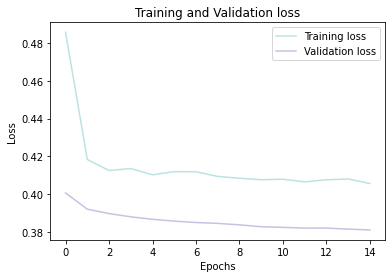

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

Plotting training and validation accuracy over epochs

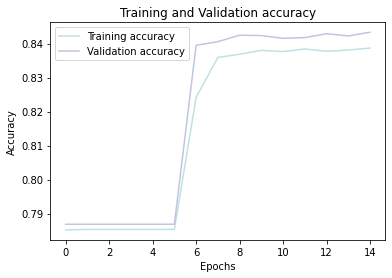

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



**Concluding the Neural model with:**

* Testing on the test set
* Evaluating the confusion matrix
* Evaluating the classification report

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

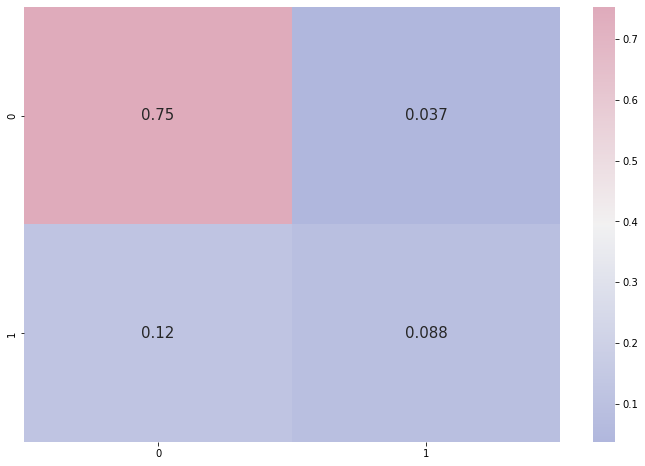

In [ ]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50.0, l=75.0, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     31192
           1       0.70      0.42      0.52      8291

    accuracy                           0.84     39483
   macro avg       0.78      0.69      0.71     39483
weighted avg       0.83      0.84      0.82     39483



In [ ]:

print("accuracy",metrics.accuracy_score(y_test, y_pred))

accuracy 0.8405896208494795
